# Bank Customer Churn Prediction

## Introduction
Dataset:Bank Customer Churn dataset (https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset)

Churn is defined by the number of customers that abandon a suscription over a period of time. In this case, we study the churn of bank customers over a period of time. By identifying the type customers that are most likely to cancel the bank account, a bank can design campaigns to ensure they retain them.


## Load dataset and libraries required

First, let's load the libraries we are going to need to load the data and to conduct an exploratory data analysis (EDA).

Since the file is relatively small, we will load the dataset using pandas:

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df_bank_churn = pd.read_csv("../input/bank-customer-churn-dataset/Bank Customer Churn Prediction.csv")
df_bank_churn.info()
print(df_bank_churn.describe())
df_bank_churn.head()


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB
        customer_id  credit_score           age        tenure        balance  \
count  1.000000e+04  10000.000000  10000.000000  10000.000000   10000.000000   
mean   1.5

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


We can see that that the dataset is quite clean and straightforward. There are no missing values in any of the variables, and the majority of them are numeric values. Only `Country` and `Gender` are string values that will need to be converted to categorical ones. Depending on the Machine Learning algorithms used, the variables `credit_score`, `age`, `estimated_salary` and `balance` will require of some scaling most probably. 

The only variable that is somehow a bit concerning is perhaps the balance, as appears that the first quartile is still at 0 while the median is 50,000. This might be indicative of the meaning of the 0 considered in the dataset. We will evaluate this when conducting histograms of the variables.

The last aspect to consider then loading the data concerns the `customer_id` variable. Since it is an identifier number (and therefore not indicative of anything else), it  should be used as index of the dataframe rather than as a feature. This is done in the in the next cell:

In [5]:
df_bank_churn = df_bank_churn.set_index('customer_id')
df_bank_churn

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
customer_id,,,,,,,,,,,
15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1


## Data Exploration 

Once we have confirmed that no data imputation is required and all the meaningful columns are in the dataframe to be used, we can moved into the exploratory and data analysis. 

Firstly, we should plot the count of the output/target variable (churn) that we aim to model. In that way, we will see whether or not the dataset is imbalanced and in case it is, the measures we need to take into account.

[Text(0, 0, 'No'), Text(1, 0, 'Yes')]

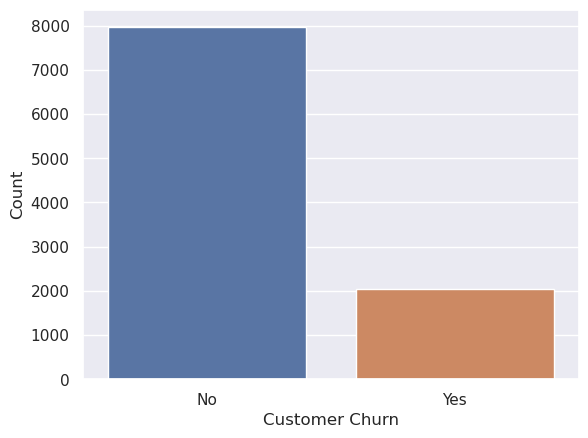

In [6]:
# Select theme for seaborn and the target variable 
sns.set_theme()
target_variable = "churn"

# Plot target variable
count_churn_plot = sns.countplot(data = df_bank_churn, x = target_variable)
count_churn_plot.set_ylabel("Count")
count_churn_plot.set_xlabel("Customer Churn")
count_churn_plot.set_xticklabels(["No", "Yes"])


There is approximately a 20% churn of customers, and therefore the outputs are imbalanced. There are worse case scenarios (e.g. 1% transaction of credit card are fraudulent) that clearly require a balance. 

Since here only one out of five is a churn, we will start with building the models without fixing the imbalance of the data initially and then we will build our models with balanced data to see if there is any meaningful improvement. 

Next step is to see the distribution of the rest of the variables (continuous and discrete) of interest in the dataset:

<Axes: xlabel='credit_score', ylabel='Count'>

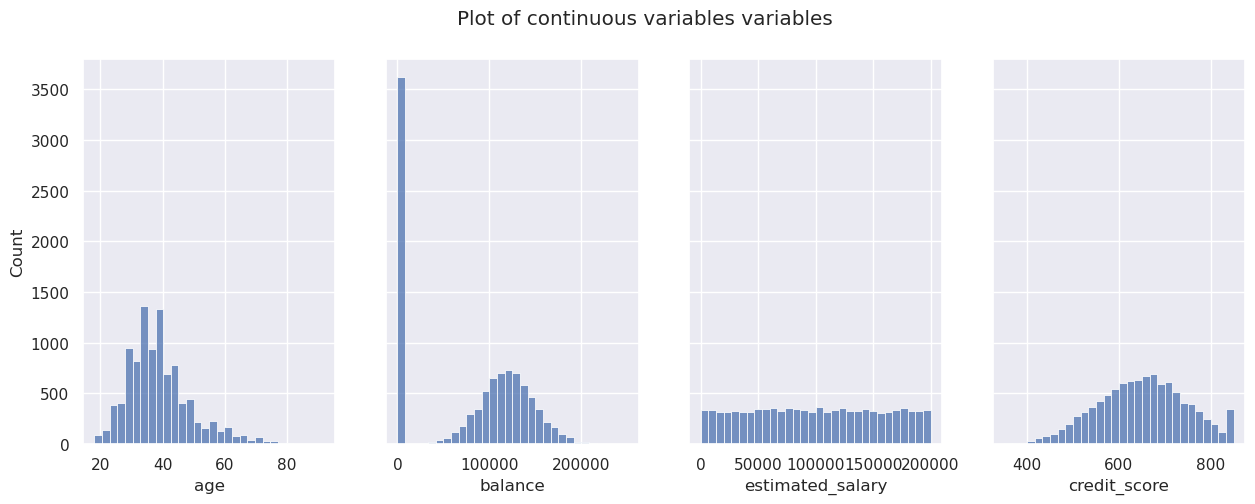

In [7]:
# Visualize in subplots the distribution of the variables
fig, axes = plt.subplots(1, 4, figsize=(15, 5), sharey=True)
fig.suptitle('Plot of continuous variables variables')

# Histogram of continuous variables
sns.histplot(ax=axes[0], data = df_bank_churn, x = "age", bins = 30)
sns.histplot(ax=axes[1], data = df_bank_churn, x = "balance", bins = 30)
sns.histplot(ax=axes[2], data = df_bank_churn, x = "estimated_salary", bins = 30)
sns.histplot(ax=axes[3], data = df_bank_churn, x = "credit_score", bins = 30)




As we can see, Age appears to be mostly focused on active age groups (30-40) and slightly positively skewed. Balance as 0 appears in may cases for many customers. Given that 35% of the customers appear to have a balance of 0, we might wonder if this data inputed is even correct or not. If the data is not correct, we might have to impute the balance following the distribution and a standard deviation of the balance available. However, given the fact that there are so many customers with balance 0, we will keep it as 0 for the initial model developed. Regarding the estimated salary, it appears to be uniformally distributed while the credit score has a bell-shape distribution with an extra peak over 850. We migh

Now we can plot the discrete variables to observe any feature of interest.

<Axes: xlabel='gender', ylabel='count'>

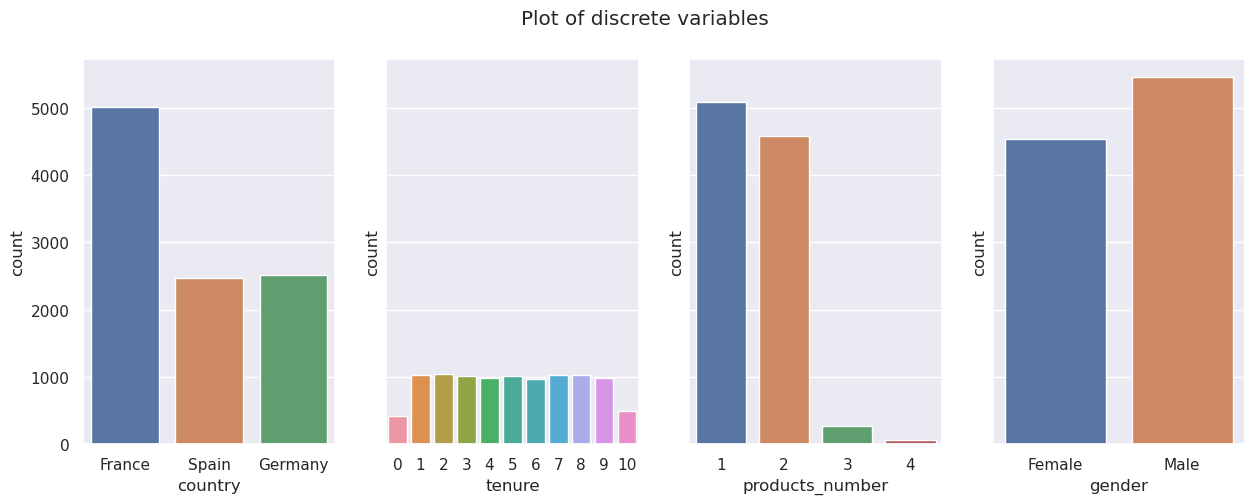

In [8]:

# Visualize in subplots the distribution of the variables
fig2, axes2 = plt.subplots(1, 4, figsize=(15, 5), sharey=True)
fig2.suptitle('Plot of discrete variables')
# Countplots of other variables
sns.countplot(ax=axes2[0], data = df_bank_churn, x = "country")
sns.countplot(ax=axes2[1], data = df_bank_churn, x = "tenure")
sns.countplot(ax=axes2[2], data = df_bank_churn, x = "products_number")
sns.countplot(ax=axes2[3], data = df_bank_churn, x = "gender")


Most of the customers are from France, while Spain and Germany have practically the same proportion of customers. Gender distribution appears to be quite balanced. We can see that most customers have either one or two products and the tenure of those products varies uniformly from 1-9 years. 

For understanding how each variable impacts another one, the best thing we can do is to plot a heatmat with the correlation (or lack thereof) between the numerical values in the dataset:

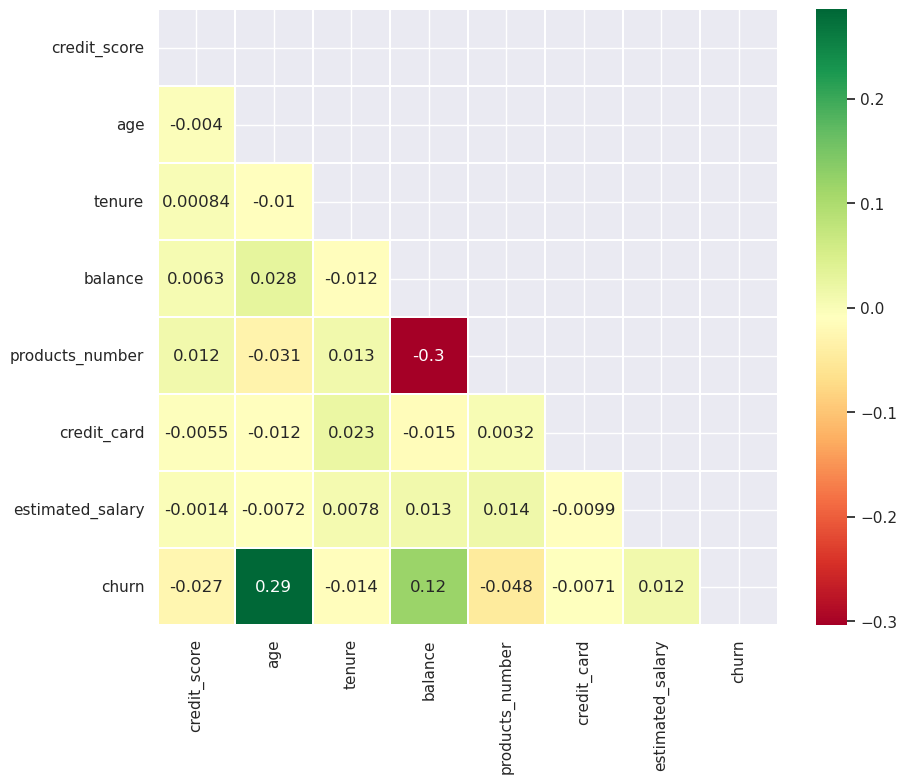

In [9]:
# Select values to calculate correlation
numerical_values = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'estimated_salary', 'churn']

# Calculate correlation matrix between numerical values
correlation_matrix = df_bank_churn[numerical_values].corr().astype(float)

# Getting the Upper Triangle of the co-relation matrix
upper_triangular_matrix = np.triu(correlation_matrix)

sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn', mask = upper_triangular_matrix, linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()  

As we can see in the heatmap, age has a stong correlation with churn as well as the products number with the balance. The balance is also somehow indicative of the churn. Therefore, it might be relevant to investigate all these balance of 0 what do they imply.

Another quick way to visualize the impact between variables is yo use the pairplot method from seaborn:

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


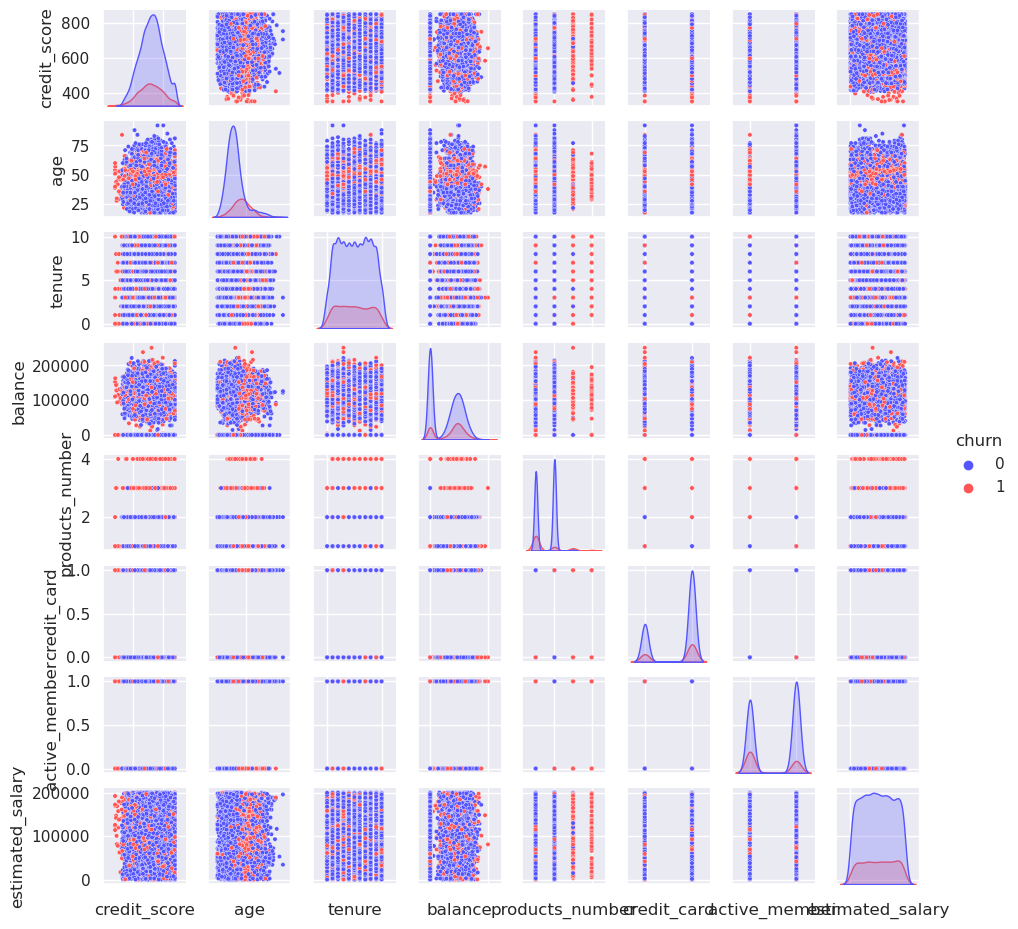

In [10]:
g = sns.pairplot(df_bank_churn, 
                hue='churn', palette = 'seismic', height=1.2, 
                diag_kind = 'kde', diag_kws=dict(fill=True),
                plot_kws=dict(s=10))
g.set(xticklabels=[])


By putting the churn as the color we can see already that the dataset is imbalanced as previously shown. In addition, we can see how the age and the churn are distributed at a certain age range, or how peopl with a larger number of products are more likely to churn.

## Split in train and test set and build ML models

### Split into train and test set

After the preliminary EDA, it is time to prepare the dataset for using ML models to classify the users as churn or not churn. We will use scikit-learn and its different modules to create the train and test sets and to implement the different machine learning models. 

Initially, we will use the dataset as is without dealing with the balance of the data and disregarding the gender and the country. We will use stratify  to ensure the model has a similar balance of churn in the train set than in the test set.

In [16]:
from sklearn.model_selection import train_test_split

# Identify variables and features
target_variable = 'churn'
features = ['credit_score',  'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member']

# Define test_size for equivalent split
test_size = 0.2
seed = 36

# Define X and y of the dataset
X_train, X_test, y_train, y_test  = train_test_split(df_bank_churn[features], df_bank_churn[target_variable],
                                                     test_size=test_size, stratify=df_bank_churn[target_variable], random_state = seed)


### Train ML Models 
Since we are trying to predict the churn for a given customer, we are facing a binary output. Therefore, it is a classification task. To conduct this classification task we will use four machine learning algorithms, namely logistic regression, support vector classifier, random forest and XGBoost classifier. We are going to put all of these algorithms inside a function so we can re-iterate the code later on when we perform feature engineering.

For measuring the performance of the models we will select the accuracy, the area under the curve (AUC), the recall and the F1 Score for each one of the models.

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb

max_depth = 4

# Create a function to use different types of classifiers
def create_classifier(classifierName, X_train, y_train, max_depth, seed):
    #Create classifier 
    if classifierName == "RandomForest":
        clf = RandomForestClassifier(n_estimators = 100, random_state = seed)
    elif classifierName == "LogisticRegression":
        clf = LogisticRegression(random_state = seed)
    elif classifierName == "SVC":
        clf = SVC(gamma='auto', random_state = seed)
    elif classifierName == "XGBoost":
        clf = xgb.XGBClassifier(max_depth = max_depth, random_state = seed)
    else:
        NameError("Incorrect classifier algorithm selected. Please select RandomForest, SVC or XGBoost")

    # Fit Classifier to train dataset
    clf = clf.fit(X_train, y_train)

    return clf

# Use prediction to evaluate either train, validation or test set
def make_prediction(clf, classifierName, X, y_true, verbose = 0):
    # Create a prediction using the classifier selected
    y_pred = clf.predict(X)

    # Calculate metrics for classifier
    accuracy = accuracy_score(y_true, y_pred)
    auc      = roc_auc_score(y_true, y_pred)
    recall   = recall_score(y_true, y_pred)
    f1_score_ = f1_score(y_true, y_pred)

    if verbose:
        print(f"Accuracy of {classifierName} is {accuracy:.3f}")
        print(f"AUC of {classifierName} is {auc:.3f}")
        print(f"Recall of {classifierName} is {recall:.3f}")
        print(f"F1 Score of {classifierName} is {f1_score_:.3f}")

    return [accuracy, auc, recall, f1_score_]

# Select models and metrics
classifiers = ["LogisticRegression", "RandomForest", "SVC", "XGBoost"]
results_column = ["Accuracy", "AUC", "Recall", "F1 Score"]

# Preallocate results and print intermediate results
model_results = []
verbose = 1
clf_dict = dict()
print(f"======== MODEL COMPARISONS SUMMARY ========")
for classifier in classifiers:
    clf = create_classifier(classifier, X_train, y_train, max_depth, seed)
    clf_dict[classifier] = clf
    model_metrics = make_prediction(clf, classifier, X_test, y_test, verbose)
    model_results.append(model_metrics)



======== MODEL COMPARISONS SUMMARY ========
Accuracy of LogisticRegression is 0.782
AUC of LogisticRegression is 0.506
Recall of LogisticRegression is 0.042
F1 Score of LogisticRegression is 0.072
Accuracy of RandomForest is 0.854
AUC of RandomForest is 0.700
Recall of RandomForest is 0.442
F1 Score of RandomForest is 0.551
Accuracy of SVC is 0.796
AUC of SVC is 0.501
Recall of SVC is 0.002
F1 Score of SVC is 0.005
Accuracy of XGBoost is 0.859
AUC of XGBoost is 0.716
Recall of XGBoost is 0.477
F1 Score of XGBoost is 0.578


Let's visualize the model metrics as a dataframe:


In [18]:
# Create util for show table results
def print_table_model_results(model_results, classifiers, results_column, decimal_numbers = 3):
    return pd.DataFrame(model_results, index = classifiers, columns=results_column).round(decimal_numbers)

model_results_raw_data = print_table_model_results(model_results, classifiers, results_column)
model_results_raw_data

,Accuracy,AUC,Recall,F1 Score
LogisticRegression,0.782,0.506,0.042,0.072
RandomForest,0.854,0.700,0.442,0.551
SVC,0.796,0.501,0.002,0.005
XGBoost,0.858,0.716,0.477,0.578


As we can see, a machine learning model used for churn prediction, the best algorithm for train and test set is _XGBoost_, followed closely by _RandomForest_. This test has been done without conducting any proper feature engineering, or any cross-validation. While the accuracy of Logistic Regression and the Support Vector Classifier offer a relatively high-accuracy, their recall is extremely low and therefore, we cannot use them for this type of models.

Now we have a base result for our models. Can we improve it by using extra features such as gender and country? A proper feature engineering should be capable to improve results. 

In addition, to verify the validity of our results, we must conduct a cross-validation. 

### Feature engineering 

Let's now do some feature engineering by scaling variables between 0 to 1 for numericals one and make one hot enconding for `gender` and `country`.

In [19]:
import copy
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelBinarizer

# Label features 
numerical_features = ["credit_score", "balance", "estimated_salary", "age"]
categorical_features = ["gender", "country"]

# Copy the original dataframe before modifying any variable
df_bank_churn_transformed = copy.deepcopy(df_bank_churn)

# Define scalers
scaler = MinMaxScaler()
one_hot = OneHotEncoder()

# Transform data
df_bank_churn_transformed[numerical_features] = scaler.fit_transform(df_bank_churn_transformed[numerical_features])
df_bank_churn_transformed = pd.get_dummies(df_bank_churn_transformed)
df_bank_churn_transformed

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain,gender_Female,gender_Male
customer_id,,,,,,,,,,,,,,
15634602,0.538,0.324324,2,0.000000,1,1,1,0.506735,1,1,0,0,1,0
15647311,0.516,0.310811,1,0.334031,1,0,1,0.562709,0,0,0,1,1,0
15619304,0.304,0.324324,8,0.636357,3,1,0,0.569654,1,1,0,0,1,0
15701354,0.698,0.283784,1,0.000000,2,0,0,0.469120,0,1,0,0,1,0
15737888,1.000,0.337838,2,0.500246,1,1,1,0.395400,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15606229,0.842,0.283784,5,0.000000,2,1,0,0.481341,0,1,0,0,0,1
15569892,0.332,0.229730,10,0.228657,1,1,1,0.508490,0,1,0,0,0,1
15584532,0.718,0.243243,7,0.000000,1,0,1,0.210390,1,1,0,0,1,0


Once we created our new dataframe with the variables scaled and the gender and nationality as one-hot encoded, we can perform the split of the train and test sets to run our models.

In [20]:
# Select features
features_transformed = df_bank_churn_transformed.columns.drop(target_variable).values
print(f"The new features selected for training the model are: \n\n {features_transformed}")

# Perform split between sets for the transformed data 
X_train_transformed, X_test_transformed, y_train_transformed, y_test_transformed  = train_test_split(df_bank_churn_transformed[features_transformed], df_bank_churn_transformed[target_variable],
                                                                                                     test_size=test_size, stratify = df_bank_churn_transformed[target_variable], random_state = seed)

The new features selected for training the model are: 

 ['credit_score' 'age' 'tenure' 'balance' 'products_number' 'credit_card'
 'active_member' 'estimated_salary' 'country_France' 'country_Germany'
 'country_Spain' 'gender_Female' 'gender_Male']


In [21]:
model_results = []
print(f"======== MODEL COMPARISONS SUMMARY ========")
for classifier in classifiers:
    clf = create_classifier(classifier, X_train_transformed, y_train_transformed, max_depth, seed)
    model_metrics = make_prediction(clf, classifier, X_test_transformed, y_test)
    model_results.append(model_metrics)

results_transformed_dataset = print_table_model_results(model_results, classifiers, results_column)
results_transformed_dataset 

======== MODEL COMPARISONS SUMMARY ========


,Accuracy,AUC,Recall,F1 Score
LogisticRegression,0.801,0.583,0.216,0.307
RandomForest,0.860,0.711,0.459,0.571
SVC,0.822,0.569,0.143,0.246
XGBoost,0.867,0.735,0.514,0.611


We can see that by scaling and using one-hot encoding, all metrics have improved for all models in the dataset

### Address imbalancing on the data
We can see that with the feature engineering of scaling samples between 0 and 1 and also one hot encoding for nationality and gender, we manage to improve the scores for all models. 

The next task is to wee if we can improve our results if we balance the dataset to train (giving the model the same number of churn negatives and positives.. First we will do undersampling (e.g. using the same number of positives and negatives in the training dataset) and then use the new trained model to predict the test dataset (without any imbalance correction).

To avoid any leak, we will do the balance to train the model only on the trained version of the transformed dataset. 

In [ ]:
#  # Balance he data
# def balance_df(x_train, y_train, seed):
#     len_df_0, len_df_1 = len(x_train[y_train == 0.]), len(x_train[y_train == 1.])
#     df_0 = x_train[y_train == 0.].sample(min(len_df_0, len_df_1), random_state=seed)
#     df_1 = x_train[y_train == 1.].sample(min(len_df_0, len_df_1), random_state=seed)
#     df = pd.concat((df_0, df_1))
#     return df

# Balance he data
def balance_df(df, target_variable, seed):
    len_df_0, len_df_1 = len(df[df[target_variable] == 0.]), len(df[df[target_variable] == 1.])
    df_0 = df[df[target_variable] == 0.].sample(min(len_df_0, len_df_1), random_state=seed)
    df_1 = df[df[target_variable] == 1.].sample(min(len_df_0, len_df_1), random_state=seed)
    df = pd.concat((df_0, df_1))
    return df


In [ ]:
df_bank_churn_transformed_train = df_bank_churn_transformed.loc[X_train_transformed.index.values].copy()


In [ ]:
# Balance the sample
df_bank_churn_balanced = balance_df(df_bank_churn_transformed_train, target_variable, seed)
print(df_bank_churn_balanced.info)


In [ ]:
# Define X and y of the dataset
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced  = train_test_split(df_bank_churn_balanced[features_transformed], df_bank_churn_balanced[target_variable],
                                                                                         test_size=test_size, stratify= df_bank_churn_balanced[target_variable], random_state = seed)


model_results = []
clf_dict_balanced = dict()

print(f"======== MODEL COMPARISONS SUMMARY ========")
for classifier in classifiers:
    clf = create_classifier(classifier, X_train_balanced, y_train_balanced, max_depth, seed)
    clf_dict_balanced[classifier] = clf
    # Making predictions on the test of the transformed dataset (without balancing the data)
    model_metrics = make_prediction(clf, classifier, X_test_transformed, y_test_transformed)
    model_results.append(model_metrics)
print_table_model_results(model_results, classifiers, results_column)



We see that by balancing the dataset, the recall and the area under the curve of all models improves substantially even if the accuracy has decreased. In fact, the SVC model that was rendered unusable in the first iteration appears to be possible to be used. The bst models still appear to be RandomForest and XGBoost.

To see that the model performs well, we need to conduct a cross-validation to ensure that we have not had a 'lucky'split and the model performs well in all unseen data.

We will conduct a 10-fold cross validation in the next section to measure the AUC and F1 of RandomForest and XGBoost. The cross-validation will be conducted on the imbalanced dataset with the transformed variables.

In [ ]:
from sklearn.model_selection import KFold, cross_validate, cross_val_score

# Select models, number of folds and metrics for cross validation
clf_models_cv = ['XGBoost', 'RandomForest']
k_folds = KFold(n_splits = 10)
scoring_metrics = ["roc_auc", "f1"]

# Iterate over models and metrics to provide a cross validation result
for clf_model in clf_models_cv:
    score = cross_validate(clf_dict_balanced[clf_model], X = df_bank_churn_transformed[features_transformed], y = df_bank_churn_transformed[target_variable], 
                           scoring = scoring_metrics,  cv = k_folds)
    for scoring_metric in scoring_metrics:
        scoring_metric_str = "test_" + scoring_metric
        # print(f"The CV {scoring_metric} scores of {clf_model} are : {score[scoring_metric_str]}")
        print(f"The Average CV {scoring_metric} score of {clf_model} is : {score[scoring_metric_str].mean().round(3)}")
        print(f'Cross-validation {scoring_metric} scores:  {score[scoring_metric_str].round(3)}')



Both models RandomForest and XGBoost appear to perform well for this dataset. I would use XGBoost in this dataset due to their faster execution when conducting new predictions. 

### Predict which customers to target

Once we have decided that we will use XGBoost, we can select which customers will we target to retain them. For that matter, we will send a promotion to those customers whose the model is predicting a 90% change of higher that will leave the bank during the study period. 

For that, we can use the trained classifier with the `predict_proba` method instead of predict. If the model is to be used in production, we will need to cross-validate and check that the performance is similar to the one obtained during cross-validation.

In [ ]:
# Load Classifier
clf_churn = clf_dict_balanced['XGBoost']
y_pred = clf_churn.predict_proba(X_test_transformed)
threshold = 0.9
customers_to_target = X_test_transformed[y_pred[:,1] > threshold]


### Future improvements

1. Address the presence of balances at 0 in the dataset.
2. Explore additional features for further model enhancement.
3. Conduct cross-validation for model validation.
